In [1]:
suppressPackageStartupMessages({
  library(dplyr)
  library(ggdensity)
  library(ggplot2)
  library(readr)
  library(stringr)
  library(latex2exp)
  library(data.table)
})

In [2]:
options(readr.show_col_types = FALSE)

In [3]:
setwd("/cloud/wwu1/h_fungenpsy/AGZiller_data/CASTOMiGEx/CAD_UKBB/eQTL_PROJECT/OUTPUT_GTEx/predict_CAD")

In [9]:
paths_go <- readr::read_delim("AllTissues/200kb/CAD_GWAS_bin5e-2/UKBB/path_GO_pval_CAD_HARD_covCorr_filt.txt") %>%
  filter(tissue == "Liver") %>%
  select(path_id, ngenes_path, genes_path) %>%
  mutate(
    genes_path = strsplit(genes_path, ","),
    ngenes_real = lengths(genes_path)
  )

In [10]:
paths_go <- filter(paths_go, ngenes_real > 1)

In [13]:
nrow(paths_go)

[1] 1514

In [11]:
paths_react <- readr::read_delim("AllTissues/200kb/CAD_GWAS_bin5e-2/UKBB/path_Reactome_pval_CAD_HARD_covCorr.txt") %>%
  filter(tissue == "Liver") %>%
  select(path, ngenes_path, genes_path) %>%
  mutate(
    genes_path = strsplit(genes_path, ","),
    ngenes_real = lengths(genes_path)
  )

In [12]:
paths_react <- filter(paths_react, ngenes_real > 1)

In [14]:
nrow(paths_react)

[1] 606

In [25]:
path_names <- expand.grid(paths_go$path_id, paths_react$path)
path_genes <- expand.grid(paths_go$genes_path, paths_react$genes_path)

In [26]:
colnames(path_names) <- c("go", "reactome")

In [27]:
jaccard_lists <- function(l1, l2) {
  j <- length(intersect(l1[[1]], l2[[1]])) / length(union(l1[[1]], l2[[1]]))
  
  return(j)
}

In [28]:
intersect_len <- function(l1, l2) {
  j <- length(intersect(l1[[1]], l2[[1]]))
  
  return(j)
}

In [29]:
nrow(path_names)

[1] 917484

In [31]:
path_names <- path_names %>%
  mutate(
    jaccard = apply(path_genes, 1, function(y) jaccard_lists(y[1], y[2])),
    il = apply(path_genes, 1, function(y) intersect_len(y[1], y[2]))                
  ) %>%
  filter(il >= 1) %>%
  na.omit()

In [33]:
path_names

,go,reactome,jaccard,il
,<fct>,<fct>,<dbl>,<int>
1,GO:0000082,ABC transporter disorders,0.200000000,2
2,GO:0000209,ABC transporter disorders,0.142857143,2
3,GO:0000278,ABC transporter disorders,0.068965517,2
4,GO:0000502,ABC transporter disorders,0.166666667,1
5,GO:0002474,ABC transporter disorders,0.153846154,2
6,GO:0002479,ABC transporter disorders,0.250000000,2
7,GO:0002931,ABC transporter disorders,0.125000000,1
8,GO:0004842,ABC transporter disorders,0.035714286,1
9,GO:0004866,ABC transporter disorders,0.090909091,1


In [36]:
readr::write_tsv(path_names, "/scratch/tmp/dolgalev/castom-igex-revision/results/palas_liver_go_reactome_jaccard.tsv")

In [13]:
pryr::mem_used()

86.7 MB

In [37]:
samp <- readr::read_delim("/cloud/wwu1/h_fungenpsy/AGZiller_data/CASTOMiGEx/CAD_UKBB/eQTL_PROJECT/INPUT_DATA_GTEx/CAD/Covariates/UKBB/covariateMatrix_latestW_202304.txt")

In [38]:
go_scores <- list()

for (i in 1:100) {
  split <- get(load(sprintf("Liver/200kb/CAD_GWAS_bin5e-2/UKBB/devgeno0.01_testdevgeno0/Pathway_GO_scores_splitPath%s.RData", i)))
  
  go_scores[[i]] <- split
}

go_scores <- do.call(rbind, go_scores)

In [39]:
go_scores <- go_scores[go_scores$path %in% path_names$go, ]

In [40]:
rownames(go_scores) <- NULL

In [41]:
go_scores <- tibble::column_to_rownames(go_scores, "path")

In [42]:
go_scores <- go_scores[, colnames(go_scores) %in% samp$Individual_ID]

In [43]:
react_scores <- list()

for (i in 1:100) {
  split <- get(load(sprintf("Liver/200kb/CAD_GWAS_bin5e-2/UKBB/devgeno0.01_testdevgeno0/Pathway_Reactome_scores_splitPath%s.RData", i)))
  
  react_scores[[i]] <- split
}

react_scores <- do.call(rbind, react_scores)

In [44]:
react_scores <- react_scores[react_scores$path %in% path_names$reactome, ]

In [45]:
rownames(react_scores) <- NULL

In [46]:
react_scores <- tibble::column_to_rownames(react_scores, "path")

In [47]:
react_scores <- react_scores[, colnames(react_scores) %in% samp$Individual_ID]

In [48]:
head(react_scores)

,X3958967,X5903051,X2135894,X1136241,X2232191,X1464958,X3901966,X2316364,X3674451,X4498514,⋯,X1227791,X2734099,X3419450,X4365009,X5251890,X3434927,X1909626,X3317476,X3749423,X4520275
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ABC transporter disorders,104.2734,-121.27094,14.12642,38.51307,-76.01640,-90.88372,77.75007,-121.09635,-88.32318,-188.34618,⋯,60.50831,129.42856,-415.89879,158.1429,78.630946,144.40209,73.047333,-75.31653,18.65187,44.18983
ABC-family proteins mediated transport,207.0104,-22.31076,81.56112,-27.53562,-45.67738,-118.95320,65.23231,-73.37498,-54.39086,-188.62107,⋯,11.77692,162.12630,-231.70824,122.9482,64.845628,111.75892,1.282966,-109.01064,-39.99095,119.76002
AKT phosphorylates targets in the cytosol,181.1775,-262.18787,-22.71141,254.91273,-136.95944,-29.89373,344.23775,20.02005,-283.02554,-176.46557,⋯,278.58062,205.79709,-244.65176,-223.0836,353.029406,-227.22247,-105.633776,138.33212,-142.42161,-220.66711
ALKBH3 mediated reversal of alkylation damage,-157.5902,84.09889,-436.18144,-191.36819,421.12508,45.58591,-297.96995,299.33840,-343.07287,111.88542,⋯,-151.44989,-128.70785,-47.20405,748.9096,114.521978,-125.89163,534.745162,169.61844,-218.95201,254.54955
APC/C-mediated degradation of cell cycle proteins,-132.0759,156.37503,-72.93071,-38.47591,-36.29423,-11.91630,123.01583,-192.71545,-107.38355,109.45442,⋯,113.37500,112.77432,-100.91560,301.1958,1.797536,-46.32257,243.673481,-94.99169,37.18944,188.67560
Abacavir transport and metabolism,-33.7155,205.75764,114.92581,-176.10706,-342.29489,195.27036,-162.07043,228.77272,-43.98184,80.73897,⋯,296.01434,80.73897,-427.67763,131.8237,-273.443637,307.04769,92.721540,-27.80178,145.25397,-204.14006


In [49]:
head(go_scores)

,X3958967,X5903051,X2135894,X1136241,X2232191,X1464958,X3901966,X2316364,X3674451,X4498514,⋯,X1227791,X2734099,X3419450,X4365009,X5251890,X3434927,X1909626,X3317476,X3749423,X4520275
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GO:0000014,-119.090121,178.52100,-377.19639,-60.06529,-367.221051,335.74325,46.45487,355.01511,-80.157360,-239.85872,⋯,58.60524,279.20538,-344.72800,-93.66374,312.03960,128.98375,11.36783,-1.26324,-157.503036,176.64686
GO:0000049,-7.374903,469.62301,-70.70274,356.02834,9.630602,78.30119,-112.10974,-305.01798,-198.681544,30.34726,⋯,-49.14478,98.69458,22.29536,-122.99321,87.40704,105.02687,16.52173,-73.70603,127.766951,-154.39554
GO:0000070,34.705540,32.16938,72.55456,-114.11220,-306.092698,191.10332,85.64553,-80.51403,27.900068,22.06178,⋯,148.31763,468.85398,-123.62136,230.39826,-190.82424,93.22566,29.01474,-93.62974,4.348178,-254.66210
GO:0000075,-139.713986,153.86021,-340.05728,-198.78031,-21.421550,158.17340,-182.82226,243.26839,-310.448432,-95.31839,⋯,351.55559,340.49169,-301.40615,-219.76431,443.68304,128.97161,-326.42242,-331.95046,-121.181986,303.36906
GO:0000077,-147.646526,-264.81566,-63.54468,-97.65296,235.783950,-203.23399,98.83398,-137.95637,-3.433012,24.79447,⋯,-227.97192,23.96905,30.24585,91.08608,72.76398,-59.47166,-13.87170,-37.07273,-162.351520,-90.35476
GO:0000079,156.729830,-184.79538,-74.30535,-291.89788,-91.470510,-164.26766,19.71054,214.65821,173.065206,230.18895,⋯,103.71204,-13.55337,-242.85785,-151.64278,-84.50359,-280.88557,126.69796,-304.88230,-233.473957,-201.72140


In [50]:
all(colnames(go_scores) == colnames(react_scores))

[1] TRUE

In [53]:
go_scores <- data.table(tibble::rownames_to_column(go_scores, "path"))

In [54]:
data.table::fwrite(go_scores, "/scratch/tmp/dolgalev/castom-igex-revision/results/palas_liver_go_scores.csv")

In [55]:
react_scores <- data.table(tibble::rownames_to_column(react_scores, "path"))

In [56]:
data.table::fwrite(react_scores, "/scratch/tmp/dolgalev/castom-igex-revision/results/palas_liver_reactome_scores.csv")

In [4]:
paths <- readr::read_csv("/scratch/tmp/dolgalev/castom-igex-revision/results/palas_liver_go_reactome_jaccard_cor.csv")

In [15]:
paths <- filter(paths, jaccard >= 0.1)

In [5]:
library(patchwork)

In [16]:
go_reactome_cor <- ggplot(paths, aes(x = jaccard, y = cor)) +
  geom_point() +
  geom_smooth(method = "lm", color = "red", level = 0.999) +
  ggpubr::stat_cor(r.accuracy = 0.001, size = 4) +
  labs(x = "Jaccard similarity coefficient", y = expression(r^2)) +
  theme_bw()

`geom_smooth()` using formula = 'y ~ x'


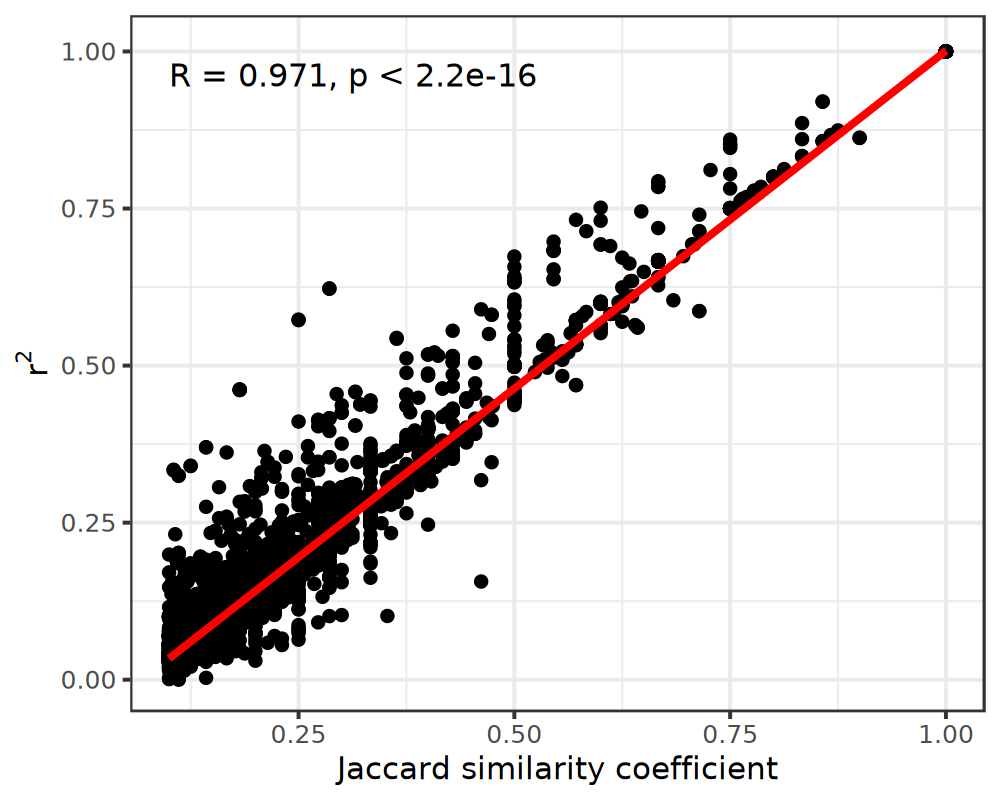

In [17]:
options(repr.plot.height = 4, repr.plot.width = 5, repr.plot.res = 200)

go_reactome_cor

In [18]:
ggsave("/scratch/tmp/dolgalev/castom-igex-revision/results/palas_liver_go_reactome_jaccard_cor_lm_2.pdf", go_reactome_cor, height = 4, width = 5, dpi = 300)

`geom_smooth()` using formula = 'y ~ x'


In [19]:
theme_get()

List of 97
 $ line                      :List of 6
  ..$ colour       : chr "black"
  ..$ linewidth    : num 0.5
  ..$ linetype     : num 1
  ..$ lineend      : chr "butt"
  ..$ arrow        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_line" "element"
 $ rect                      :List of 5
  ..$ fill         : chr "white"
  ..$ colour       : chr "black"
  ..$ linewidth    : num 0.5
  ..$ linetype     : num 1
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_rect" "element"
 $ text                      :List of 11
  ..$ family       : chr ""
  ..$ face         : chr "plain"
  ..$ colour       : chr "black"
  ..$ size         : num 11
  ..$ hjust        : num 0.5
  ..$ vjust        : num 0.5
  ..$ angle        : num 0
  ..$ lineheight   : num 0.9
  ..$ margin       : 'margin' num [1:4] 0points 0points 0points 0points
  .. ..- attr(*, "unit")= int 8
  ..$ debug        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr